# Project Luther Analysis 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pprint import pprint
import sklearn
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from xgboost import plot_importance



%matplotlib inline

/Users/KVASU/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv("Movie_Analysis.csv")
df


,Unnamed: 0,domestic total gross,days,Title,Metascore,imdbRating,Budget_Int,Foreign_Int,Runtime_Int,G,PG,PG-13,R,action,comedy,drama
0,0,60522097,80.0,After Earth,33.0,4.9,130000000.0,183321030.0,100,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1,54240821,119.0,The Hundred-Foot Journey,55.0,7.3,22000000.0,34640000.0,122,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,2,93436322,119.0,Tomorrowland,60.0,6.5,190000000.0,115718000.0,130,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3,166112167,101.0,2012,49.0,5.8,200000000.0,603567306.0,158,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,4,81159365,56.0,21,48.0,6.8,35000000.0,76767975.0,123,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,5,138447667,108.0,21 Jump Street,69.0,7.2,42000000.0,63137661.0,109,0.0,0.0,0.0,1.0,1.0,1.0,0.0
6,6,191719337,157.0,22 Jump Street,71.0,7.1,50000000.0,139614539.0,112,0.0,0.0,0.0,1.0,1.0,1.0,0.0
7,7,76808654,133.0,27 Dresses,47.0,6.1,30000000.0,83450665.0,107,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,8,127154901,133.0,2 Fast 2 Furious,38.0,5.9,76000000.0,109195760.0,101,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9,9,75612460,84.0,2 Guns,55.0,6.7,61000000.0,56327951.0,109,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [3]:
df3 = df

In [4]:
df3.corr()

,Unnamed: 0,domestic total gross,days,Metascore,imdbRating,Budget_Int,Foreign_Int,Runtime_Int,G,PG,PG-13,R,action,comedy,drama
Unnamed: 0,1.000000,-0.031998,-0.065811,-0.041369,-0.028874,0.015863,-0.014357,-0.038324,0.024348,-0.022127,0.059811,-0.055358,0.021155,-0.017324,-0.042290
domestic total gross,-0.031998,1.000000,0.373920,0.294193,0.291519,0.600762,0.819816,0.262886,0.021330,0.083401,0.124084,-0.215628,0.227675,-0.094760,-0.175990
days,-0.065811,0.373920,1.000000,0.373891,0.357397,0.134472,0.301819,0.128475,0.092937,0.210811,-0.069728,-0.140632,-0.033771,0.057241,0.047841
Metascore,-0.041369,0.294193,0.373891,1.000000,0.743280,0.121858,0.222251,0.336035,0.037815,-0.016106,-0.103978,0.113413,-0.079211,-0.177779,0.232062
imdbRating,-0.028874,0.291519,0.357397,0.743280,1.000000,0.154500,0.248369,0.426525,-0.088563,-0.066838,-0.064993,0.161877,0.009404,-0.278095,0.266399
Budget_Int,0.015863,0.600762,0.134472,0.121858,0.154500,1.000000,0.728631,0.370807,0.009483,0.119623,0.186456,-0.310654,0.446641,-0.204345,-0.222407
Foreign_Int,-0.014357,0.819816,0.301819,0.222251,0.248369,0.728631,1.000000,0.299044,0.013640,0.121968,0.104629,-0.224802,0.302951,-0.199341,-0.204544
Runtime_Int,-0.038324,0.262886,0.128475,0.336035,0.426525,0.370807,0.299044,1.000000,-0.129016,-0.282338,0.163995,0.112877,0.187347,-0.409373,0.350977
G,0.024348,0.021330,0.092937,0.037815,-0.088563,0.009483,0.013640,-0.129016,1.000000,-0.086232,-0.169053,-0.114629,-0.110610,0.150507,-0.080771
PG,-0.022127,0.083401,0.210811,-0.016106,-0.066838,0.119623,0.121968,-0.282338,-0.086232,1.000000,-0.469529,-0.318372,-0.162291,0.228682,-0.179132


In [5]:
x1 = df3['domestic total gross']
x2 = df3['Metascore']
x3 = df3['imdbRating']
x4 = df3['Budget_Int']
x5 = df3['Foreign_Int']
x6 = df3['Runtime_Int']
x7 = df3['G']
x8 = df3['PG']
x9 = df3['PG-13']
x10 = df3['R']
x11 = df3['action']
x12 = df3['comedy']
x13 = df3['drama']

y = df3['days']

# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('y ~ x1 +x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 + x11 + x12 + x13', data=df3, return_type="dataframe")
#took out 
# Create your model
model = sm.OLS(y, X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     30.54
Date:                Fri, 07 Oct 2016   Prob (F-statistic):           1.36e-57
Time:                        08:05:49   Log-Likelihood:                -3991.5
No. Observations:                 797   AIC:                             8009.
Df Residuals:                     784   BIC:                             8070.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7327     10.305      0.071      0.943       -19.495    20.961
x1          1.295e-07   2.77e-08      4.683      0.000      7.52e-08  1.84e-07
x2             0.3867      0.122      3.163      0.002         0.147     0.627
x3             9.9936      2.267      4.408      0.000         5.543    14.444
x4         -1.841e-07    3.9e-08     -4.722      0.000     -2.61e-07 -1.08e-07
x5          3.557e-08   1.65e-08      2.149      0.032      3.08e-09  6.81e-08
x6             0.1765      0.091      1.947      0.052        -0.001     0.354
x7            17.9067      6.422      2.788      0.005         5.301    30.512
x8            13.0350      3.790      3.440      0.001         5.596    20.474
x9           -10.1581      3.695     -2.749      0.006       -17.411    -2.905
x10          -20.0509      4.290     -4.674      0.000       -28.472   -11.629
x11            6.9222      3.458      2.002      0.046         0.135    13.709
x12           13.0542      3.241      4.028      0.000         6.692    19.416
x13            6.4074      3.464      1.850      0.065        -0.392    13.207
==============================================================================
Omnibus:                      324.282   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2698.101
Skew:                           1.619   Prob(JB):                         0.00
Kurtosis:                      11.412   Cond. No.                     5.93e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

0.310880165226
y    36.989734
dtype: float64


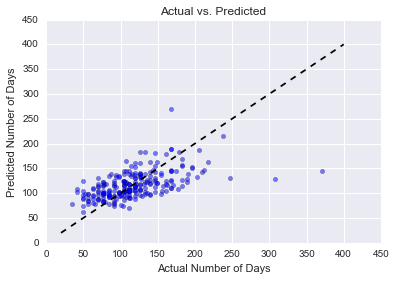

In [6]:
X = pd.concat([x1, x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13],axis=1).reset_index()
y = y


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
model_lr = LinearRegression(fit_intercept=True)
model_lr.fit(X_train, y_train)
pred_vals_lr = model_lr.predict(X_test)
RMSE_lr = np.sqrt(np.sum((pred_vals_lr - y_test)**2)/len(y_test))
print (model_lr.score(X_test,y_test))
print (RMSE_lr)

temp = np.linspace(20,400,400)



plt.scatter(y_test,pred_vals_lr,alpha=.5)
plt.plot(temp,temp,'k--')
plt.title('Actual vs. Predicted')
plt.ylabel('Predicted Number of Days')
plt.xlabel('Actual Number of Days')

/Users/KVASU/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.369276623331


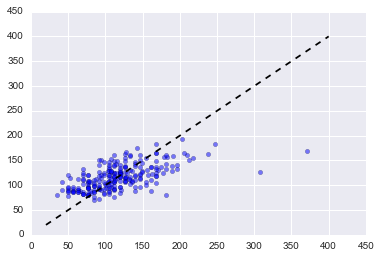

In [7]:
rfmodel1 = RandomForestRegressor(n_estimators = 10, max_features = 3,
                                min_samples_leaf = 5, n_jobs=4, random_state=10)
rfmodel1.fit(X_train,y_train)
pred_vals_rf1 = rfmodel1.predict(X_test)

print (rfmodel1.score(X_test,y_test))

temp = np.linspace(20,400,400)
plt.scatter(y_test,pred_vals_rf1,alpha=.5)
plt.plot(temp,temp,'k--')

/Users/KVASU/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.387927230378


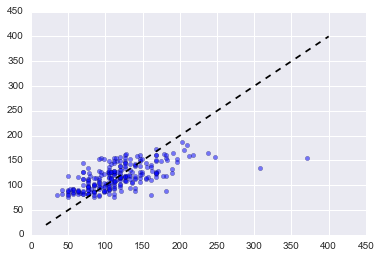

In [8]:
rfmodel2 = RandomForestRegressor(n_estimators = 1000, max_features = 6,
                                min_samples_leaf = 5, n_jobs=4, random_state=10)

#1
rfmodel2.fit(X_train,y_train)
pred_vals_rf2 = rfmodel2.predict(X_test)
print rfmodel2.score(X_test,y_test)



temp = np.linspace(20,400,400)
plt.scatter(y_test,pred_vals_rf2,alpha=.5)
plt.plot(temp,temp,'k--')

/Users/KVASU/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.389696049966


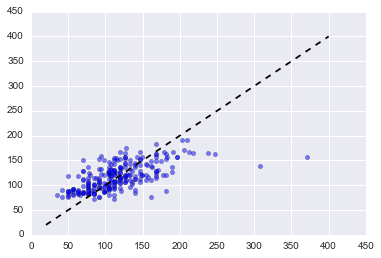

In [45]:
rfmodel2 = RandomForestRegressor(n_estimators = 1000, max_features = 11,
                                min_samples_leaf = 5, n_jobs=4, random_state=10)

#1
rfmodel2.fit(X_train,y_train)
pred_vals_rf2 = rfmodel2.predict(X_test)
print rfmodel2.score(X_test,y_test)



temp = np.linspace(20,400,400)
plt.scatter(y_test,pred_vals_rf2,alpha=.5)
plt.plot(temp,temp,'k--')

In [9]:
rfmodel2 = RandomForestRegressor(n_estimators = 1000, max_features = 11,
                                min_samples_leaf = 5, n_jobs=4, random_state=100)

#100
rfmodel2.fit(X_train,y_train)
pred_vals_rf2 = rfmodel2.predict(X_test)
print rfmodel2.score(X_test,y_test)

/Users/KVASU/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.389496775986


Telling a story about what variables you chose.

Even if there was no correlation.

keep track of what you tried and what worked and didnt work

Presenting the process.

0.396239536542


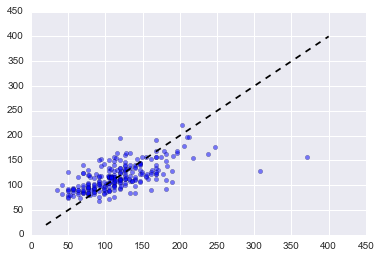

In [10]:
gbm = xgb.XGBRegressor(max_depth=2, n_estimators=200, learning_rate=0.1).fit(X_train, y_train)
predictions = gbm.predict(X_test)
print gbm.score(X_test, y_test)
#plot_importance(gbm);
#print (gbm.eval_metric['rmse'])


temp = np.linspace(20,400,400)
plt.scatter(y_test,predictions,alpha=.5)
plt.plot(temp,temp,'k--')

In [11]:
X2 = pd.concat([x2,x3,x4,x6,x7,x8,x9,x10,x11,x12,x13],axis=1).reset_index()
y2 = y


X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state = 0)

/Users/KVASU/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.330678298793


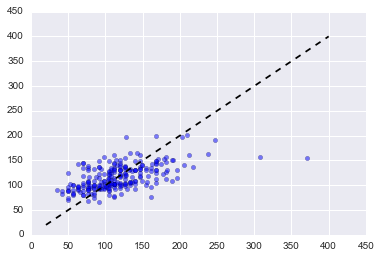

In [12]:
rfmodel2 = RandomForestRegressor(n_estimators = 1000, max_features = 11,
                                min_samples_leaf = 5, n_jobs=4, random_state=10)

#1
rfmodel2.fit(X2_train,y2_train)
pred_vals_rf2 = rfmodel2.predict(X2_test)
print rfmodel2.score(X2_test,y2_test)



temp = np.linspace(20,400,400)
plt.scatter(y2_test,pred_vals_rf2,alpha=.5)
plt.plot(temp,temp,'k--')

0.35147530788


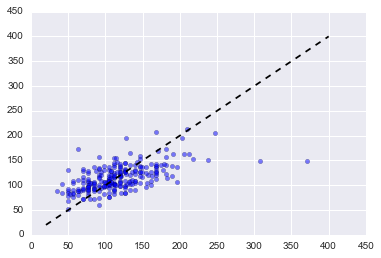

In [13]:
gbm = xgb.XGBRegressor(max_depth=2, n_estimators=200, learning_rate=0.1).fit(X2_train, y2_train)
predictions = gbm.predict(X2_test)
print gbm.score(X2_test, y2_test)
#plot_importance(gbm);
#print (gbm.eval_metric['rmse'])


temp = np.linspace(20,400,400)
plt.scatter(y2_test,predictions,alpha=.5)
plt.plot(temp,temp,'k--')

0.280462768777
y    37.797273
dtype: float64


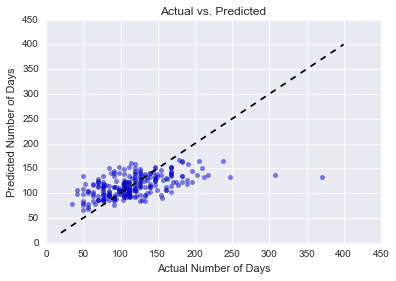

In [14]:
model_lr = LinearRegression(fit_intercept=True)
model_lr.fit(X2_train, y2_train)
pred_vals_lr = model_lr.predict(X2_test)
RMSE_lr = np.sqrt(np.sum((pred_vals_lr - y2_test)**2)/len(y2_test))
print (model_lr.score(X2_test,y2_test))
print (RMSE_lr)

temp = np.linspace(20,400,400)



plt.scatter(y2_test,pred_vals_lr,alpha=.5)
plt.plot(temp,temp,'k--')
plt.title('Actual vs. Predicted')
plt.ylabel('Predicted Number of Days')
plt.xlabel('Actual Number of Days')

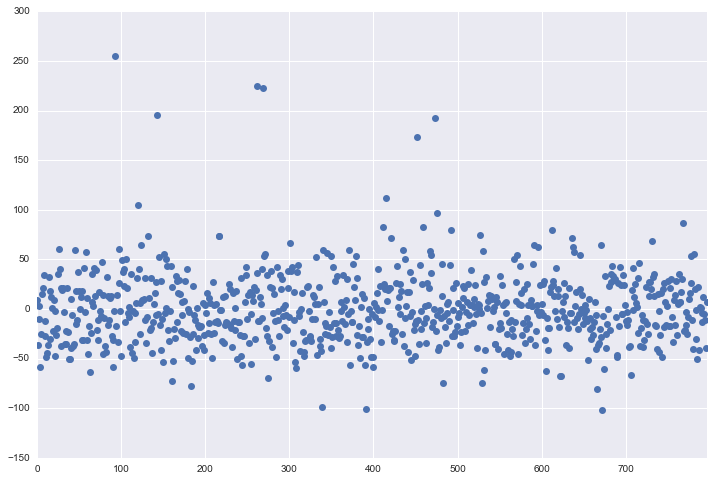

In [23]:
'''Going to Plot Residuals'''
lm30 = smf.OLS(y, X)
fit30 = lm30.fit()
fit30.summary()
fit30.resid.plot(style='o', figsize=(12,8))